# Accessories EDA Workshop

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
data=pd.read_csv('AksesuarDatayeni.csv')

In [11]:
data.head()

,Buyer Grup (Türkçe),Buyer,Ürün Ana Grup,Ürün Klasman,Sezon,Sipariş Kodu,Özel Kod 1,Cinsiyet,NOS Ürün Mü?,Planlanan Fast Track Siparişi,...,Uç Beden Gelen Sipariş Oranı,Fast Track Net Sipariş Miktarı,Inspection Geçme Oranı,Ticari Onay Oranı,Exfactory Gecikme Gün,Uc Beden Eksik Gelen Siparis Sayısı,Sipariş-Merkez Süre,Model Bütçe Gecikme Gün,Sipariş - Orijinal Exfactory Süre,Sipariş Durum
0,AKSESUAR,AYŞE ASLAN,ÜRÜN,KEY AKSESUAR ATKI/BERE/ELDIVEN,8W,463888,8W9173Z1,K,0,HAYIR,...,0.0,NaN,1.0,0.0,0.0,0,105.945067,0.0,113.0,gecikmis
1,AKSESUAR,AYŞE ASLAN,ÜRÜN,KEY AKSESUAR ATKI/BERE/ELDIVEN,8W,463891,8W8557Z1,K,0,HAYIR,...,0.0,NaN,1.0,0.0,0.0,0,92.456493,0.0,113.0,gecikmis
2,AKSESUAR,AYŞE ASLAN,ÜRÜN,KEY AKSESUAR ATKI/BERE/ELDIVEN,8W,466588,8W5157Z1,U,0,HAYIR,...,0.0,NaN,0.5,0.0,21.0,0,111.240901,0.0,92.0,gecikmis
3,AKSESUAR,AYŞE ASLAN,ÜRÜN,KEY AKSESUAR ATKI/BERE/ELDIVEN,8W,466592,8W5158Z1,U,0,HAYIR,...,0.0,NaN,1.0,0.0,0.0,0,90.959636,0.0,92.0,gecikmis
4,AKSESUAR,AYŞE ASLAN,ÜRÜN,KEY AKSESUAR ATKI/BERE/ELDIVEN,8W,468413,8W8325Z1,K,0,HAYIR,...,0.0,NaN,1.0,0.0,42.0,0,154.000000,0.0,111.0,gecikmis


In [12]:
data.isnull().sum() #checking for total null values

Buyer Grup (Türkçe)                      0
Buyer                                    0
Ürün Ana Grup                            0
Ürün Klasman                             0
Sezon                                    0
Sipariş Kodu                             0
Özel Kod 1                               0
Cinsiyet                                 0
NOS Ürün Mü?                             0
Planlanan Fast Track Siparişi            0
Üretici                                  0
Üretici Bölgesi                        210
İklim Kosulu                             0
Yurtiçi / Yurtdışı                       0
Sevkiyat Rotası                          0
Net Sipariş Miktarı                      0
Tamir Miktarı                            0
Tamir Oranı                             63
Model Bütçe Termin Performansı          82
Exfactory Termin Performansı            65
Uç Beden Gelen Sipariş Oranı            61
Fast Track Net Sipariş Miktarı         475
Inspection Geçme Oranı                  63
Ticari Onay

In [ ]:
## Üretici Bölgesinden yarısından fazlası boş, silinmeli
## Model Bütçe Gecikme Gün de yarısından fazlası yok çünkü yeni sezonu data da dahil ettik , çıkarılmalı datadan.

## bir feature silebilmek için (sütun) görselleştirme ile bakılabilir
## bir satır silmek için, örneğin outlier olanları eleyebilecek düzenlemeler yapabilirsin.

# Sipariş Durum Analizi

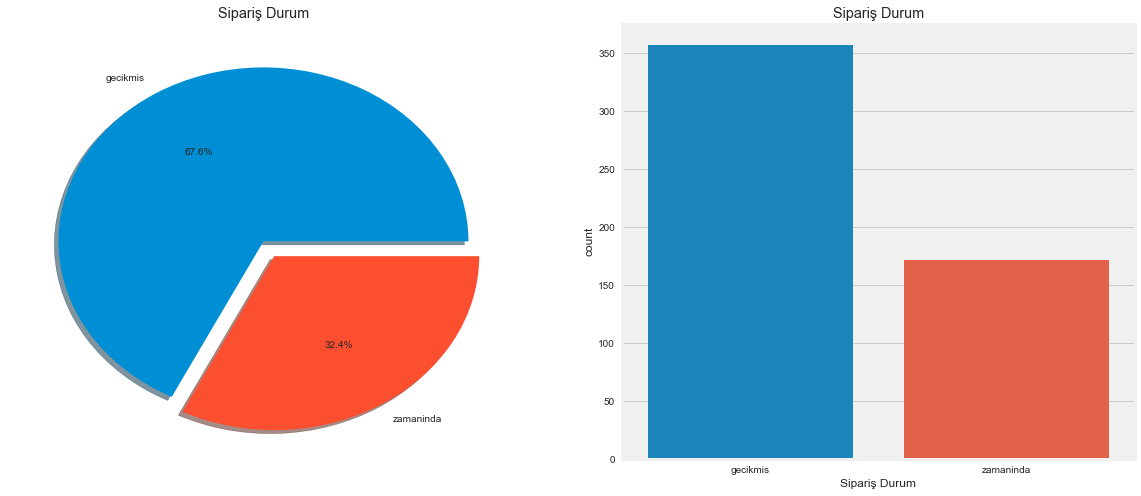

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8)) ## figsize = boyutunu belirliyorsun
data['Sipariş Durum'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Sipariş Durum')
ax[0].set_ylabel('')
sns.countplot('Sipariş Durum',data=data,ax=ax[1])
ax[1].set_title('Sipariş Durum')
plt.show()

In [21]:
data.groupby(['Sezon','Model Bütçe Gecikme Gün'])['Sipariş Durum'].count()

Sezon  Model Bütçe Gecikme Gün
8S     0.00                       70
       1.00                        1
       2.00                        1
       3.00                        4
       4.00                        1
       5.00                        2
       5.67                        1
       7.00                        1
       8.00                        1
       9.00                        2
       11.00                       3
       11.69                       1
       12.00                       3
       12.18                       1
       13.00                       1
       14.00                       3
       16.00                       1
       17.00                       2
       18.00                       2
       19.00                       3
       20.00                       1
       21.00                       2
       21.36                       1
       23.00                       2
       23.73                       1
       24.00                       2
       

In [22]:
data.groupby(['Buyer','Sipariş Durum'])['Sipariş Durum'].count()

Buyer          Sipariş Durum
AYŞE ASLAN     gecikmis         335
               zamaninda        171
SENEM BOZKURT  gecikmis          22
Name: Sipariş Durum, dtype: int64

In [29]:
data.groupby(['Ürün Klasman','Sipariş Durum'])['Sipariş Durum'].count()

Ürün Klasman                    Sipariş Durum
KEY AKSESUAR ATKI/BERE/ELDIVEN  gecikmis          18
                                zamaninda          9
KEY AKSESUAR BEBE URUNLERI      gecikmis          45
                                zamaninda         45
KEY AKSESUAR KRAVAT/PAPYON      gecikmis          12
                                zamaninda          1
KEY AKSESUAR SAPKA              gecikmis         106
                                zamaninda         26
KEY AKSESUAR SAÇ BANDI          gecikmis          30
                                zamaninda         18
KEY ÖRME YENİDOĞAN BATTANİYE    gecikmis          35
                                zamaninda         24
KEY İÇGİYİM MAMA ÖNLÜĞÜ         gecikmis         111
                                zamaninda         48
Name: Sipariş Durum, dtype: int64

In [25]:
## Şapka ve mama önlük de yığılma çok

In [40]:
data_filtered = data[data['Ürün Klasman'] == 'KEY AKSESUAR SAPKA'] 
data_filtered.groupby(['Üretici','Sipariş Durum','Ürün Klasman'])['Sipariş Durum'].count() 

Üretici                                             Sipariş Durum  Ürün Klasman      
AY-KAV TEKSTİL ÖRME SAN. VE TİC. LTD.ŞTİ            gecikmis       KEY AKSESUAR SAPKA     6
                                                    zamaninda      KEY AKSESUAR SAPKA     1
BONTİ TEKSTİL AKSESUAR SAN. TİC.LTD.ŞTİ.            gecikmis       KEY AKSESUAR SAPKA     3
DORJE TEKSTİL TURIZM SAN VE TİC.LTD.ŞTİ             gecikmis       KEY AKSESUAR SAPKA     6
ERMODA TEKSTİL KONFEKSİYON SAN. TİC. LTD. ŞTİ       zamaninda      KEY AKSESUAR SAPKA     1
FONEM TEKSTİL İHRACAT İTH. SAN. VE TİC. LTD. ŞTİ.   gecikmis       KEY AKSESUAR SAPKA    10
                                                    zamaninda      KEY AKSESUAR SAPKA    14
HANGZHOU DOLONG IMPORT &EXPORT CO. LTD (USD)        gecikmis       KEY AKSESUAR SAPKA     1
HIGH HOPE INT'L GROUP JIANGSU FOODSTUFFS IMP & EXP  gecikmis       KEY AKSESUAR SAPKA    27
                                                    zamaninda      KEY AKSESUAR SAPKA 

In [ ]:
## HIGH HOPE VE TAHA GİYİMDE SİPARİŞ GECİKMELERİ FAZLA

In [41]:
şapkadata=data_filtered.groupby(['Üretici','Sipariş Durum','Ürün Klasman'])['Sipariş Durum'].count()

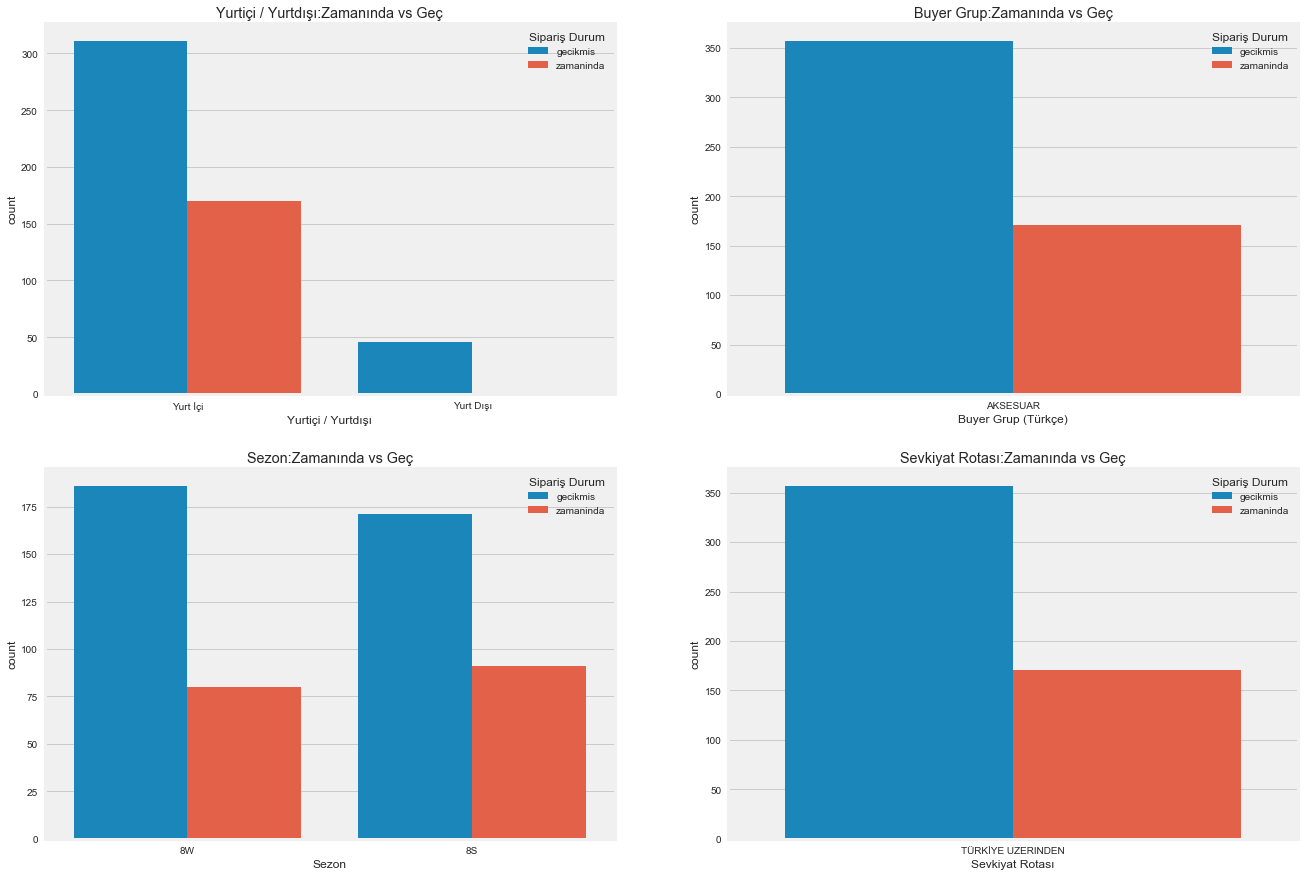

In [33]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Yurtiçi / Yurtdışı',hue='Sipariş Durum',data=data,ax=ax[0,0])
ax[0,0].set_title('Yurtiçi / Yurtdışı:Zamanında vs Geç')
sns.countplot('Buyer Grup (Türkçe)',hue='Sipariş Durum',data=data,ax=ax[0,1])
ax[0,1].set_title('Buyer Grup:Zamanında vs Geç')
sns.countplot('Sezon',hue='Sipariş Durum',data=data,ax=ax[1,0])
ax[1,0].set_title('Sezon:Zamanında vs Geç')
sns.countplot('Sevkiyat Rotası',hue='Sipariş Durum',data=data,ax=ax[1,1])
ax[1,1].set_title('Sevkiyat Rotası:Zamanında vs Geç')
plt.show()

In [34]:
data['Fast Track Net Sipariş Miktarı'].fillna(0, inplace=True) ## Fast Trackteki null değerleri 0 ile değiştik
data['Planlanan Fast Track Siparişi'].replace(['EVET','HAYIR'],[1,0],inplace=True)
data['Yurtiçi / Yurtdışı'].replace(['Yurt İçi','Yurt Dışı'],[1,0],inplace=True)
data.drop(['Özel Kod 1'],axis=1,inplace=True)
data.head()

,Buyer Grup (Türkçe),Buyer,Ürün Ana Grup,Ürün Klasman,Sezon,Sipariş Kodu,Cinsiyet,NOS Ürün Mü?,Planlanan Fast Track Siparişi,Üretici,...,Uç Beden Gelen Sipariş Oranı,Fast Track Net Sipariş Miktarı,Inspection Geçme Oranı,Ticari Onay Oranı,Exfactory Gecikme Gün,Uc Beden Eksik Gelen Siparis Sayısı,Sipariş-Merkez Süre,Model Bütçe Gecikme Gün,Sipariş - Orijinal Exfactory Süre,Sipariş Durum
0,AKSESUAR,AYŞE ASLAN,ÜRÜN,KEY AKSESUAR ATKI/BERE/ELDIVEN,8W,463888,K,0,0,FONEM TEKSTİL İHRACAT İTH. SAN. VE TİC. LTD. ŞTİ.,...,0.0,0,1.0,0.0,0.0,0,105.945067,0.0,113.0,gecikmis
1,AKSESUAR,AYŞE ASLAN,ÜRÜN,KEY AKSESUAR ATKI/BERE/ELDIVEN,8W,463891,K,0,0,FONEM TEKSTİL İHRACAT İTH. SAN. VE TİC. LTD. ŞTİ.,...,0.0,0,1.0,0.0,0.0,0,92.456493,0.0,113.0,gecikmis
2,AKSESUAR,AYŞE ASLAN,ÜRÜN,KEY AKSESUAR ATKI/BERE/ELDIVEN,8W,466588,U,0,0,AY-KAV TEKSTİL ÖRME SAN. VE TİC. LTD.ŞTİ,...,0.0,0,0.5,0.0,21.0,0,111.240901,0.0,92.0,gecikmis
3,AKSESUAR,AYŞE ASLAN,ÜRÜN,KEY AKSESUAR ATKI/BERE/ELDIVEN,8W,466592,U,0,0,AY-KAV TEKSTİL ÖRME SAN. VE TİC. LTD.ŞTİ,...,0.0,0,1.0,0.0,0.0,0,90.959636,0.0,92.0,gecikmis
4,AKSESUAR,AYŞE ASLAN,ÜRÜN,KEY AKSESUAR ATKI/BERE/ELDIVEN,8W,468413,K,0,0,FONEM TEKSTİL İHRACAT İTH. SAN. VE TİC. LTD. ŞTİ.,...,0.0,0,1.0,0.0,42.0,0,154.000000,0.0,111.0,gecikmis


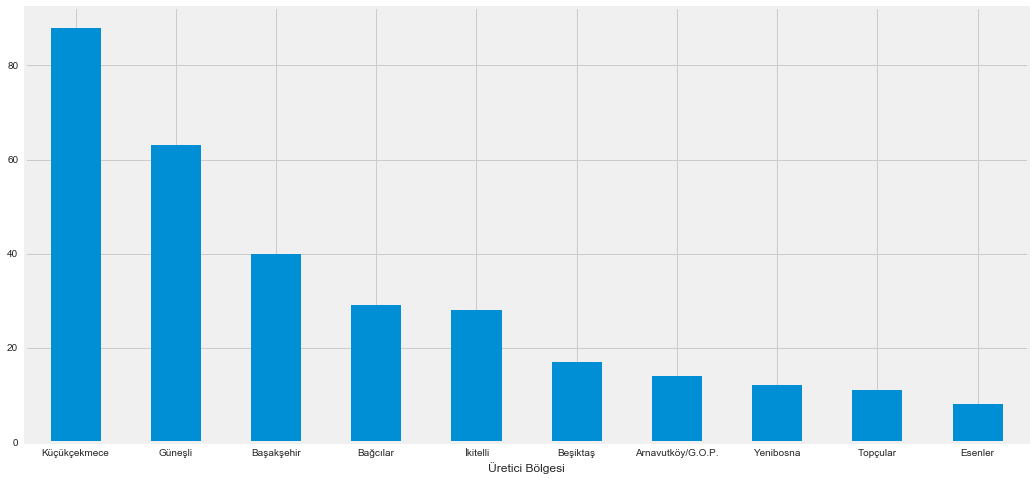

In [35]:
c1 = data.groupby('Üretici Bölgesi')['Sipariş Kodu'].nunique().sort_values(ascending=False)
c2 = c1.head(10)
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)

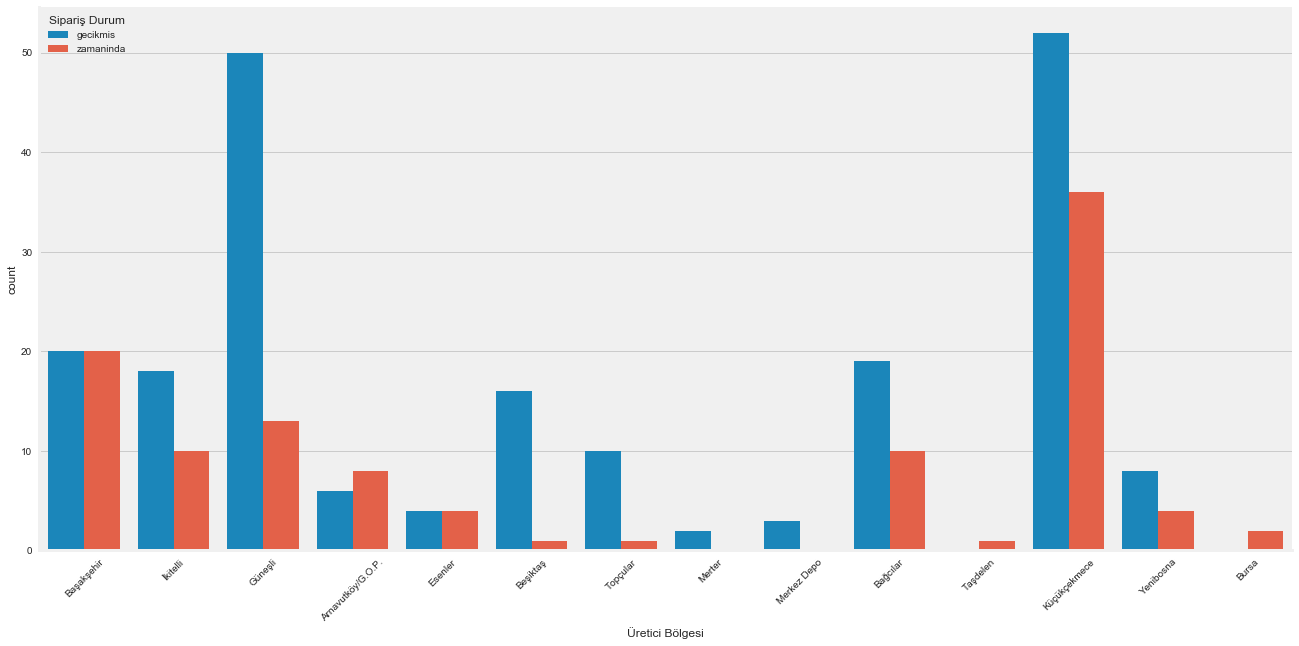

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot('Üretici Bölgesi',hue='Sipariş Durum',data=data,ax=ax)
plt.xticks(rotation= 45)
sns.despine()

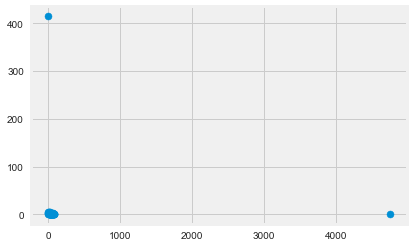

In [37]:

data['Model Bütçe Gecikme Gün'].fillna(0, inplace=True)
plt.scatter(data['Model Bütçe Gecikme Gün'].value_counts().index.values,data['Model Bütçe Gecikme Gün'].value_counts())

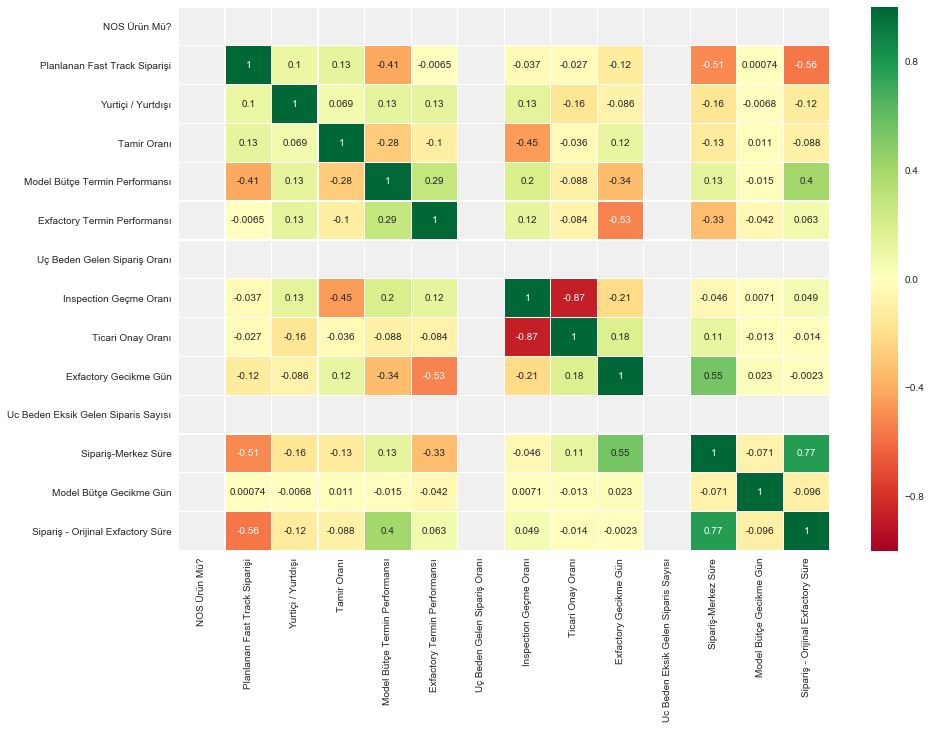

In [39]:
data['Sipariş Durum'].replace(['Zamanında','Geç'],[1,0],inplace=True)
data.drop(['Sipariş Kodu'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(13,10)
plt.show()